### Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [4]:
mall_customers=pd.read_csv("Mall_Customers.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_customers.shape

(200, 5)

In [7]:
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

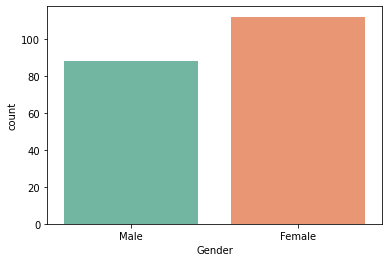

In [10]:
sns.countplot(x='Gender',data=mall_customers, palette='Set2')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

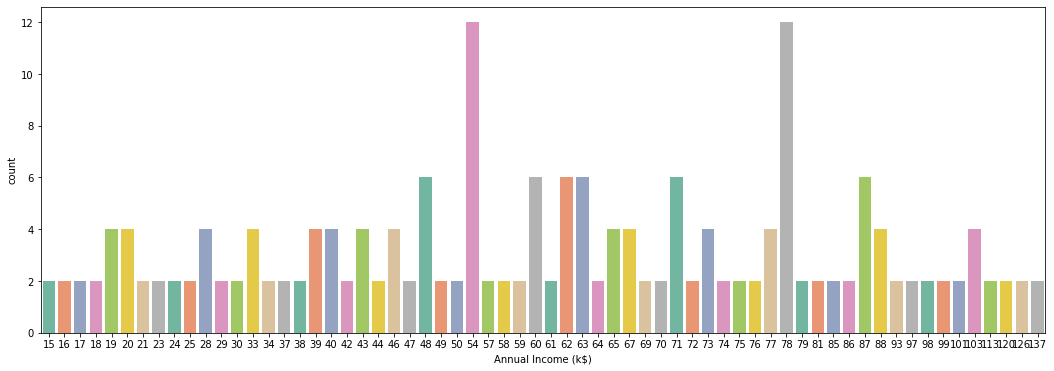

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(x='Annual Income (k$)',data=mall_customers, palette='Set2')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

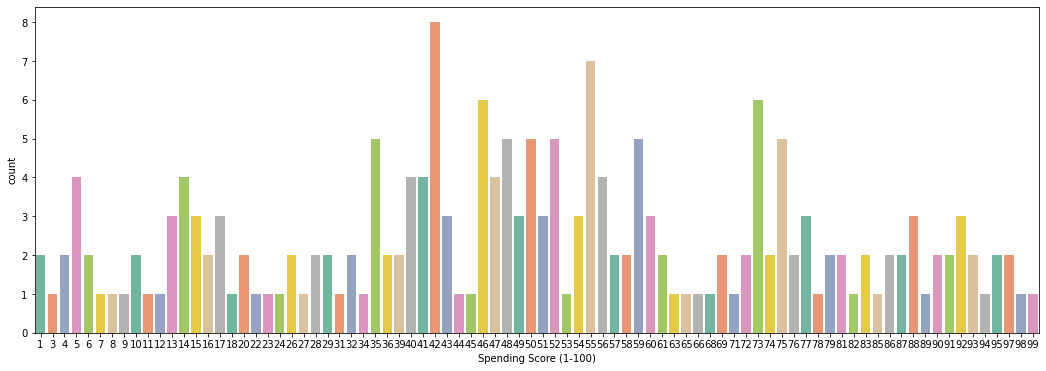

In [15]:
plt.figure(figsize=(18,6))
sns.countplot(x='Spending Score (1-100)',data=mall_customers, palette='Set2')

### Features

In [17]:
X=mall_customers.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


####  Elbow Method

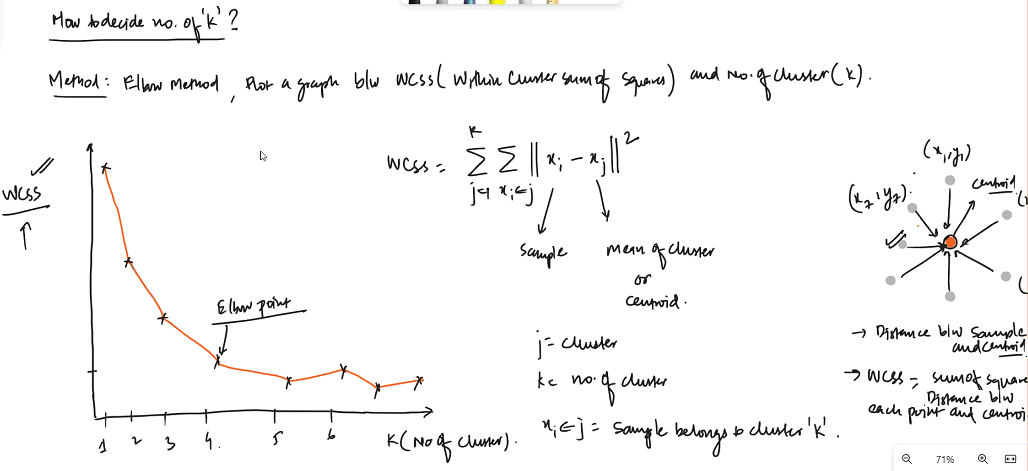

In [18]:
from sklearn.cluster import KMeans

In [22]:
# use Elbow Method to find out the optimum number of K i.e clusters 
wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    #wcss =within cluster sum of squares
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181626,
 12064.939000692291]

<function matplotlib.pyplot.show(close=None, block=None)>

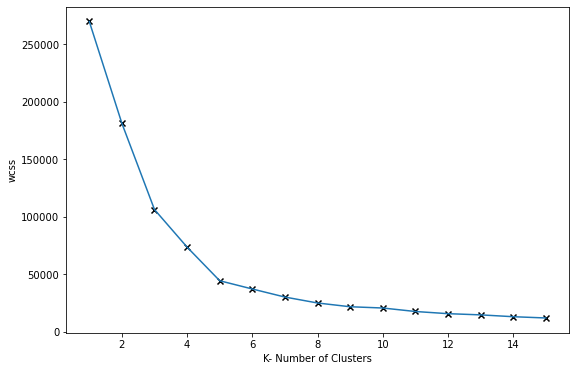

In [26]:
#plot Visualization b/w wcss & Number of Clusters (K)
plt.figure(figsize=(9,6))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, marker='x', color='k')
plt.xlabel("K- Number of Clusters")
plt.ylabel("wcss")
plt.show

**Optimum value of k =5**

In [27]:
#init= 'k-means++' random centroid values, max_iter=maximum iteration, 
#n_init=number of times kmeans algorithm will run with diffrent centroid seeds
kmeans= KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [28]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [30]:
y_clusters=kmeans.fit_predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [31]:
#centroid
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [32]:
#within Clusters of sum of squares
kmeans.inertia_

44448.45544793371

#### Cluster Visualization

In [33]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [34]:
mall_customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

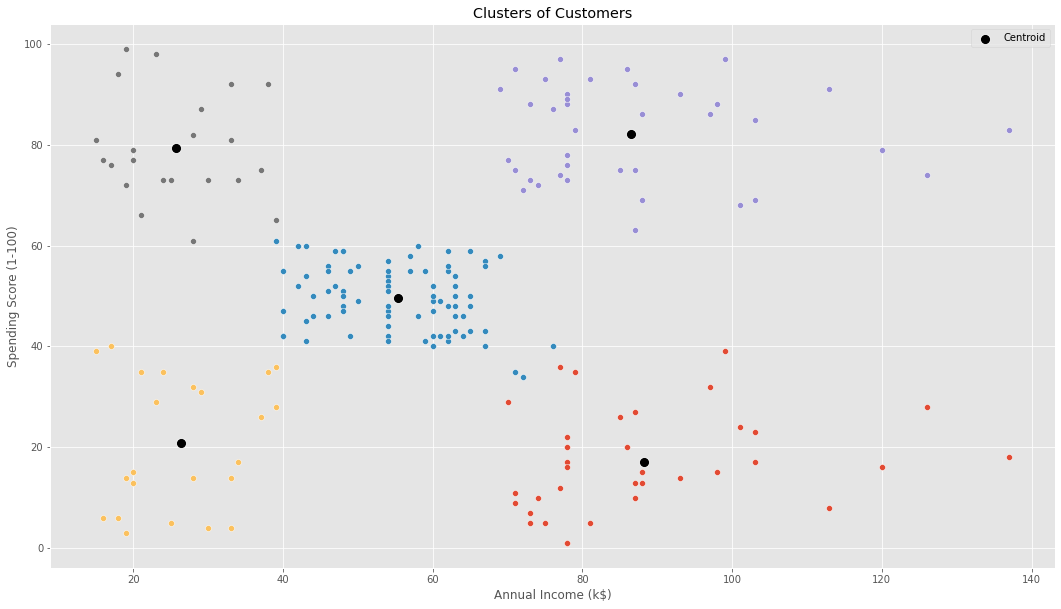

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(18,10))

#filter records features for each Cluster
sns.scatterplot(x=X[y_clusters==0]['Annual Income (k$)'], y=X[y_clusters==0]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_clusters==1]['Annual Income (k$)'], y=X[y_clusters==1]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_clusters==2]['Annual Income (k$)'], y=X[y_clusters==2]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_clusters==3]['Annual Income (k$)'], y=X[y_clusters==3]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_clusters==4]['Annual Income (k$)'], y=X[y_clusters==4]['Spending Score (1-100)'])

sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], markers='x', color='black',
                label='Centroid', s=100)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [40]:
#Predict for a samples
X_new=[[50,42]]
kmeans.predict(X_new)

array([1])

### Hierarchical clustering

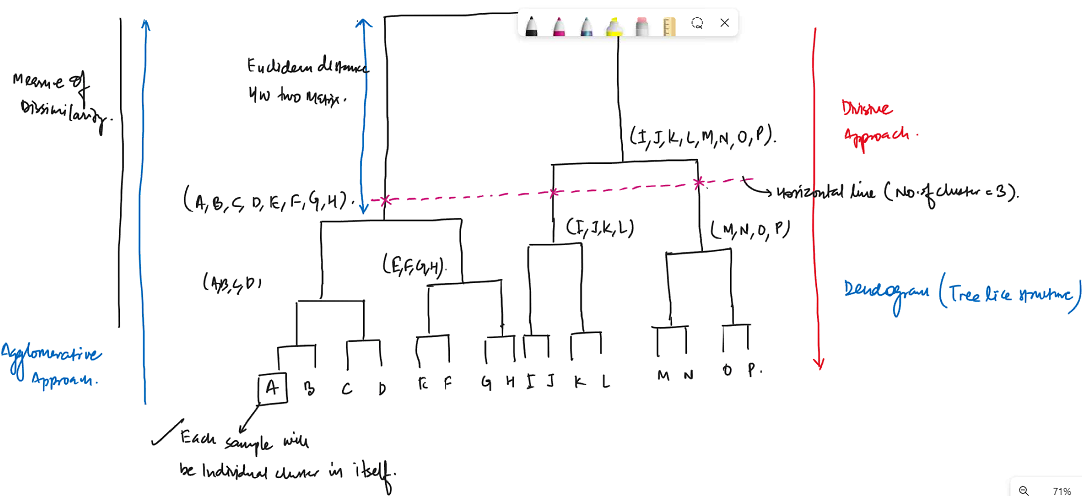

**for Optimal no clusters draw hiorizontal line at long vertical line and count the no of vertical line => 3 in above
as shown in above**

#### Draw Dendogram

<function matplotlib.pyplot.show(close=None, block=None)>

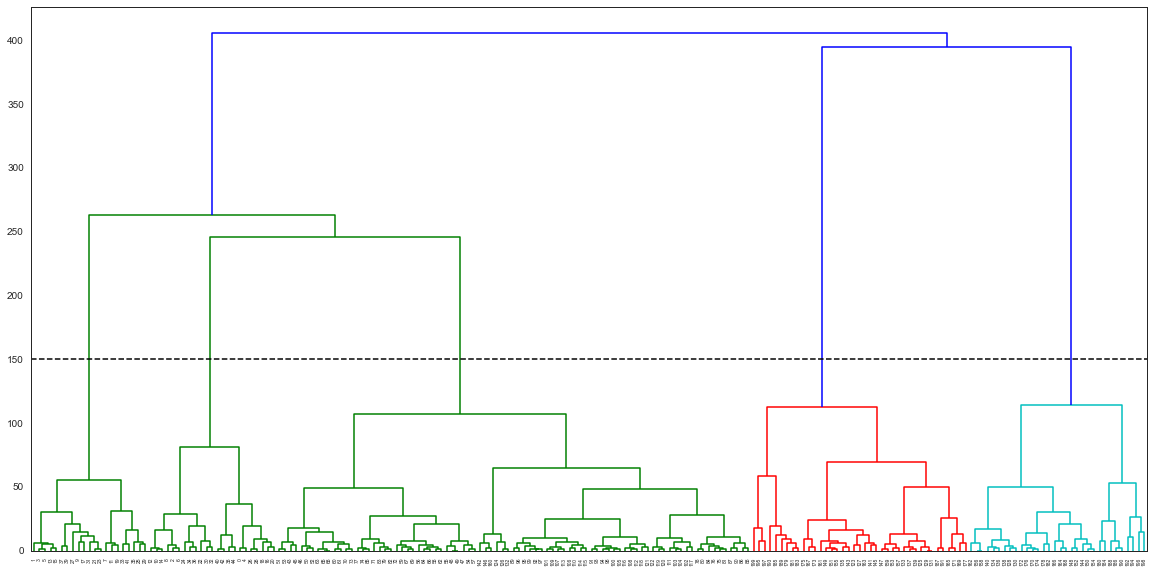

In [48]:
import scipy.cluster.hierarchy as sch
sns.set_style('white')
fig=plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=150,color='k', linestyle='--')
plt.show

* Here if draw horizontal line along the longest vertical line and we count the no of verical line on that horizontal line then we get optimal value for k=5 i.e clusters 

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [43]:
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

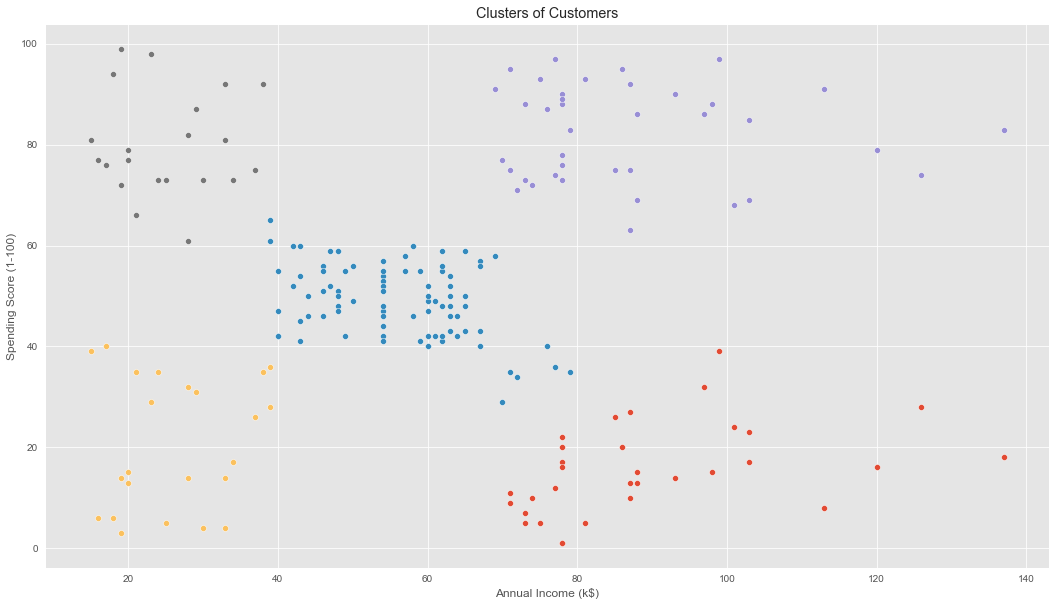

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(18,10))

#filter records features for each Cluster
sns.scatterplot(x=X[y_hc==0]['Annual Income (k$)'], y=X[y_hc==0]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_hc==1]['Annual Income (k$)'], y=X[y_hc==1]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_hc==2]['Annual Income (k$)'], y=X[y_hc==2]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_hc==3]['Annual Income (k$)'], y=X[y_hc==3]['Spending Score (1-100)'])
sns.scatterplot(x=X[y_hc==4]['Annual Income (k$)'], y=X[y_hc==4]['Spending Score (1-100)'])
#here there is no requirment of centoid bcz centroid is part of k means
#sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], markers='x', color='black',
#                label='Centroid', s=100)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()